<a href="https://colab.research.google.com/github/jyotishsanchi/NLP_Learnings/blob/main/Topics_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical

In [3]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
import os
os.chdir('/content/drive/MyDrive')

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
df = pd.read_csv('topics.csv')

In [9]:
df.head()

,Unnamed: 0,question_text,question_topic
0,0,"Hi! If I sign up for your email list, can I se...",Sales/Promotions
1,1,I'm going to be out of the country for about a...,Shipping
2,2,I was wondering if you'd be able to overnight ...,Shipping
3,3,The Swingline electronic stapler (472555) look...,Shipping
4,4,I think this cosmetic bag would work great for...,Shipping


In [10]:
df = df.rename(columns={'question_text':'text', 'question_topic': 'topic'})

In [11]:
df = df.drop('Unnamed: 0', axis=1)

In [12]:
df.head()

,text,topic
0,"Hi! If I sign up for your email list, can I se...",Sales/Promotions
1,I'm going to be out of the country for about a...,Shipping
2,I was wondering if you'd be able to overnight ...,Shipping
3,The Swingline electronic stapler (472555) look...,Shipping
4,I think this cosmetic bag would work great for...,Shipping


In [13]:
df['topic'].value_counts()

Product Specifications    839
Product Availability      833
Product Comparison        806
Shipping                  799
Returns & Refunds         768
Sales/Promotions          505
Omnichannel               450
Name: topic, dtype: int64

In [14]:
le = LabelEncoder()
df['topic'] = le.fit_transform(df['topic'])

In [15]:
df['topic'].value_counts()

3    839
1    833
2    806
6    799
4    768
5    505
0    450
Name: topic, dtype: int64

In [16]:
df.isnull().sum()

text     0
topic    0
dtype: int64

### Process text

In [17]:
lemmatizer = WordNetLemmatizer() 

In [18]:
stopwords = set(stopwords.words('english'))

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def preprocess_text(df, column_name=''):
  # Remove punctuations
  df[column_name] = df[column_name].apply(lambda x: ' '.join([word for word in x.split() if word not in string.punctuation]))

  # Select only alphabets
  df[column_name] = df[column_name].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))

  # Convert text to lowercase
  df[column_name] = df[column_name].apply(lambda x: x.lower())

  # Strip unwanted spaces
  df[column_name] = df[column_name].apply(lambda x: x.strip())

  # Remove stopwords
  df[column_name] = df[column_name].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in stopwords]))

  # Replace empty strings with Null
  df[column_name].replace('', np.nan, inplace = True)

  # Drop Null values
  df = df.dropna()

  return df

In [21]:
df = preprocess_text(df, column_name='text')

In [22]:
df.head()

,text,topic
0,hi sign email list select get email exclusivel...,5
1,going country week travel going getting animal...,6
2,wondering able overnight jacket item 5220032 t...,6
3,swingline electronic stapler 472555 look reall...,6
4,think cosmetic bag would work great however kn...,6


In [23]:
type(df['text'][0])

str

In [24]:
X = df.text
y = df.topic

In [25]:
cv = CountVectorizer(max_features=10000)
Xx = cv.fit_transform(X).toarray()

In [26]:
X_train_sl, X_test_sl, y_train_sl, y_test_sl = train_test_split(Xx, y, test_size = 0.3, random_state=42)

In [27]:
svm = SVC().fit(X_train_sl, y_train_sl)

y_pred_svm=svm.predict(X_test_sl)

In [28]:
print(classification_report(y_test_sl, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       131
           1       0.91      0.94      0.92       236
           2       0.90      0.96      0.93       247
           3       0.94      0.92      0.93       253
           4       1.00      1.00      1.00       248
           5       1.00      0.92      0.96       152
           6       1.00      1.00      1.00       233

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500



In [29]:
NB = MultinomialNB().fit(X_train_sl, y_train_sl)
y_pred_nb=NB.predict(X_test_sl)

In [30]:
print(classification_report(y_test_sl, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       131
           1       0.88      0.90      0.89       236
           2       0.83      0.85      0.84       247
           3       0.88      0.81      0.84       253
           4       0.98      0.99      0.98       248
           5       0.95      0.97      0.96       152
           6       0.99      1.00      0.99       233

    accuracy                           0.92      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.92      0.92      0.92      1500



### Deep Learning

In [31]:
df['length'] = df['text'].apply(lambda x: len(x))

In [32]:
df['length'].describe()

count    5000.000000
mean       97.544200
std        43.622538
min        14.000000
25%        66.000000
50%        92.000000
75%       124.000000
max       327.000000
Name: length, dtype: float64

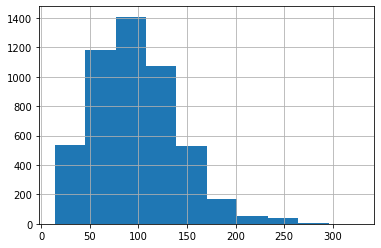

In [33]:
df['length'].hist()

In [34]:
df[df['length'] > 300]

,text,topic,length
3624,either foundation http www lancome usa com mak...,2,327
3790,either 1byone 400ml mini thermo electric air d...,3,307


In [35]:
df = df.sample(frac = 1) 

In [36]:
import sklearn

In [37]:
df = sklearn.utils.shuffle(df)

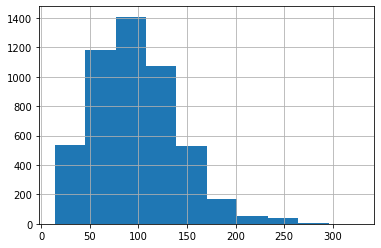

In [38]:
df['length'].hist()

In [39]:
X = df.text
y = df.topic

In [40]:
y = to_categorical(y, num_classes=7)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500,)
(1500,)
(3500, 7)
(1500, 7)


In [46]:
type(X_train)

pandas.core.series.Series

In [47]:
X_train[1:2]

495    laptop better screen resolution lenovo ideapad...
Name: text, dtype: object

In [48]:
vocab_size = 10000
max_len = 300
trunc_type = "post" 
padding_type = "post"

In [49]:
feature_tokenizer = Tokenizer(num_words=vocab_size)
feature_tokenizer.fit_on_texts(X_train)

X_train = feature_tokenizer.texts_to_sequences(X_train)
X_train_padding = pad_sequences (X_train, maxlen = max_len, padding = padding_type, truncating = trunc_type )

X_test = feature_tokenizer.texts_to_sequences(X_test)
X_test_padding = pad_sequences (X_test, maxlen = max_len, padding = padding_type, truncating = trunc_type )

print("Number of Samples in X_train:", len(X_train))       
print(X_train[0])
print(X_train_padding[0])

Number of Samples in X_train: 3500
[1209, 665, 361, 33, 2739, 2740, 145, 2741, 1918]
[1209  665  361   33 2739 2740  145 2741 1918    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   

In [50]:
print(X_train_padding.shape)
print(X_test_padding.shape)

(3500, 300)
(1500, 300)


In [57]:
#LSTM hyperparameters
n_lstm = 16
drop_lstm = 0.2
embeding_dim = 300

In [73]:
from tensorflow.keras.layers import BatchNormalization, Bidirectional, Flatten

In [88]:
model1 = Sequential()
model1.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model1.add(Bidirectional(LSTM(256, return_sequences = True)))
model1.add(Bidirectional(LSTM(128, return_sequences = False)))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(256, activation = 'relu'))
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(64, activation= 'relu'))
model1.add(Dropout(0.5))
model1.add(Dense(7, activation="softmax"))

In [89]:
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [90]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.01)
mc = ModelCheckpoint('best_model1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [91]:
batch_size = 256
epochs = 30

model1_history = model1.fit(X_train_padding,  y_train, 
                            batch_size=batch_size, epochs=epochs, 
                            validation_data=(X_test_padding, y_test),
                            callbacks=[es, mc])

Epoch 1/30
14/14 [==============================] - ETA: 0s - loss: 1.8443 - accuracy: 0.2457
Epoch 00001: val_accuracy improved from -inf to 0.33600, saving model to best_model1.h5
14/14 [==============================] - 9s 624ms/step - loss: 1.8443 - accuracy: 0.2457 - val_loss: 1.6099 - val_accuracy: 0.3360
Epoch 2/30
14/14 [==============================] - ETA: 0s - loss: 1.4420 - accuracy: 0.3949
Epoch 00002: val_accuracy improved from 0.33600 to 0.49267, saving model to best_model1.h5
14/14 [==============================] - 7s 521ms/step - loss: 1.4420 - accuracy: 0.3949 - val_loss: 1.2679 - val_accuracy: 0.4927
Epoch 3/30
14/14 [==============================] - ETA: 0s - loss: 1.1786 - accuracy: 0.4651
Epoch 00003: val_accuracy improved from 0.49267 to 0.50333, saving model to best_model1.h5
14/14 [==============================] - 7s 519ms/step - loss: 1.1786 - accuracy: 0.4651 - val_loss: 1.0539 - val_accuracy: 0.5033
Epoch 4/30
14/14 [==============================] - ETA

In [92]:
# load the saved model
saved_model = load_model('best_model1.h5')

# evaluate the model
_, train_acc = saved_model.evaluate(X_train_padding,  y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test_padding, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.999, Test: 0.919


In [78]:
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model2.add(Bidirectional(LSTM(256, return_sequences = False)))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation = 'relu'))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(64, activation= 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(7, activation="softmax"))

In [79]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [80]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.01)
mc = ModelCheckpoint('best_model2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

batch_size = 100
epochs = 20

model2_history = model2.fit(X_train_padding,  y_train, 
                            batch_size=batch_size, epochs=epochs, 
                            validation_data=(X_test_padding, y_test),
                            callbacks=[es, mc])

Epoch 1/20
35/35 [==============================] - ETA: 0s - loss: 1.7997 - accuracy: 0.2591WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0178s vs `on_test_batch_end` time: 0.0401s). Check your callbacks.

Epoch 00001: val_accuracy improved from -inf to 0.41333, saving model to best_model2.h5
35/35 [==============================] - 9s 243ms/step - loss: 1.7997 - accuracy: 0.2591 - val_loss: 1.4033 - val_accuracy: 0.4133
Epoch 2/20
35/35 [==============================] - ETA: 0s - loss: 1.0594 - accuracy: 0.5900
Epoch 00002: val_accuracy improved from 0.41333 to 0.76200, saving model to best_model2.h5
35/35 [==============================] - 7s 202ms/step - loss: 1.0594 - accuracy: 0.5900 - val_loss: 0.6328 - val_accuracy: 0.7620
Epoch 3/20
35/35 [==============================] - ETA: 0s - loss: 0.4696 - accuracy: 0.8354
Epoch 00003: val_accuracy improved from 0.76200 to 0.84667, saving model to best_model2.h5
35/35 [======

In [81]:
# load the saved model
saved_model = load_model('best_model2.h5')

# evaluate the model
_, train_acc = saved_model.evaluate(X_train_padding,  y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test_padding, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.999, Test: 0.929


In [74]:
model3 = Sequential()
model3.add(Embedding(10000, 300, input_length=300))
model3.add(Bidirectional(LSTM(256, return_sequences = True)))
model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(256, activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(128, activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(64, activation= 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(7, activation="softmax"))

In [75]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.01)
mc = ModelCheckpoint('best_model3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

batch_size = 100
epochs = 20

model3_history = model3.fit(X_train_padding,  y_train, 
                            batch_size=batch_size, epochs=epochs, 
                            validation_data=(X_test_padding, y_test),
                            callbacks=[es, mc])

Epoch 1/20
35/35 [==============================] - ETA: 0s - loss: 2.1682 - accuracy: 0.1511WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0167s vs `on_test_batch_end` time: 0.0500s). Check your callbacks.

Epoch 00001: val_accuracy improved from -inf to 0.16000, saving model to best_model3.h5
35/35 [==============================] - 14s 391ms/step - loss: 2.1682 - accuracy: 0.1511 - val_loss: 1.9251 - val_accuracy: 0.1600
Epoch 2/20
35/35 [==============================] - ETA: 0s - loss: 1.9591 - accuracy: 0.1671
Epoch 00002: val_accuracy improved from 0.16000 to 0.28600, saving model to best_model3.h5
35/35 [==============================] - 14s 394ms/step - loss: 1.9591 - accuracy: 0.1671 - val_loss: 1.9207 - val_accuracy: 0.2860
Epoch 3/20
35/35 [==============================] - ETA: 0s - loss: 1.8856 - accuracy: 0.1940
Epoch 00003: val_accuracy improved from 0.28600 to 0.42533, saving model to best_model3.h5
35/35 [====

In [77]:
# load the saved model
saved_model = load_model('best_model3.h5')

# evaluate the model
_, train_acc = saved_model.evaluate(X_train_padding,  y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test_padding, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.999, Test: 0.945
